## Libraries

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dataset

In [100]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [102]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP: resting blood pressure [mm Hg] there are 0, meaning lack of information
Cholesterol: serum cholesterol [mm/dl], there are 0, meaning lack of information

In [103]:
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [104]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


I am a visual person so just gonna go straight to visualisations

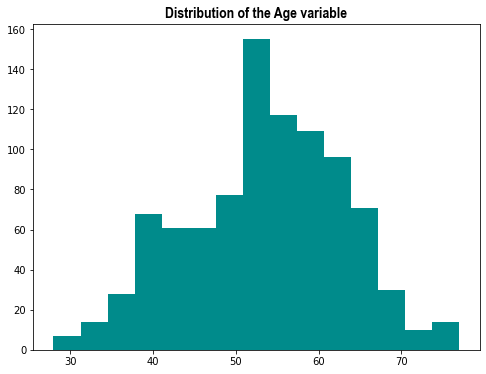

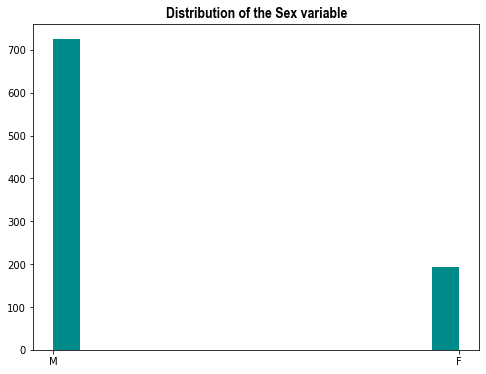

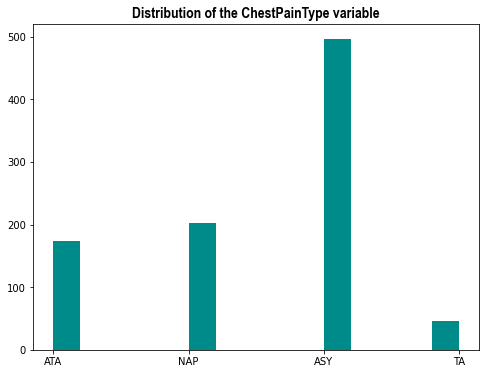

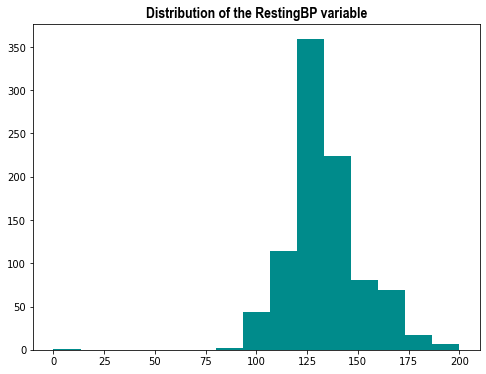

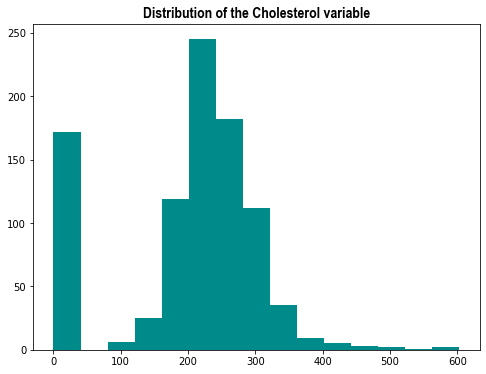

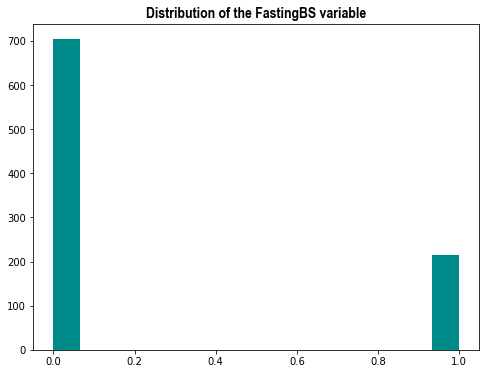

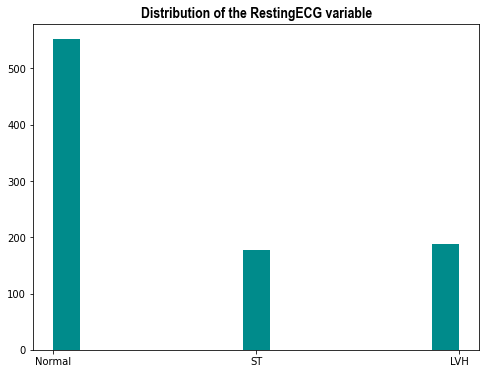

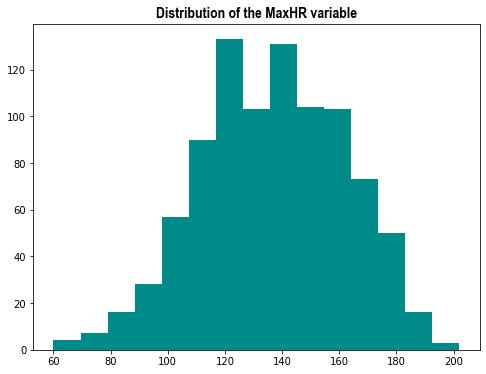

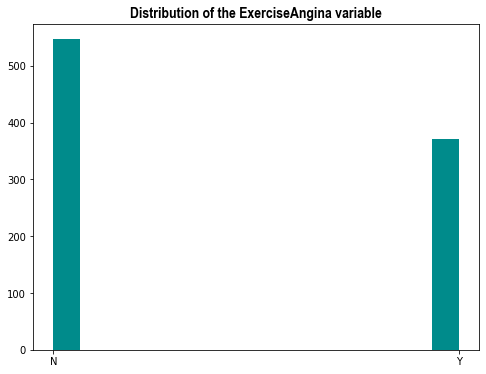

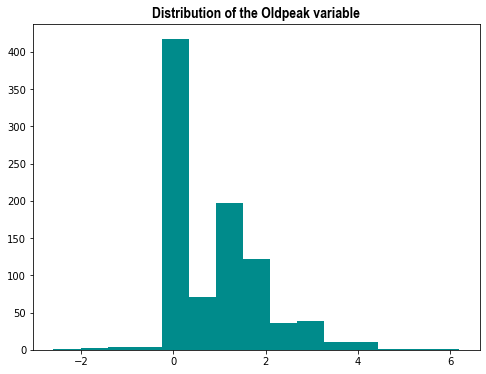

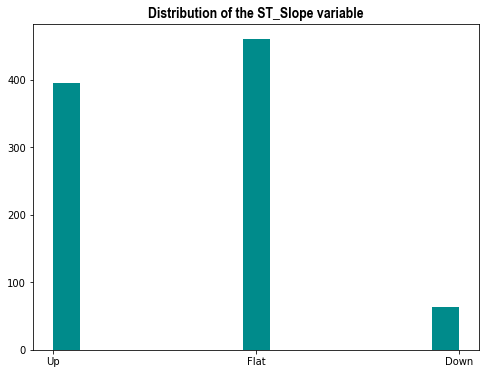

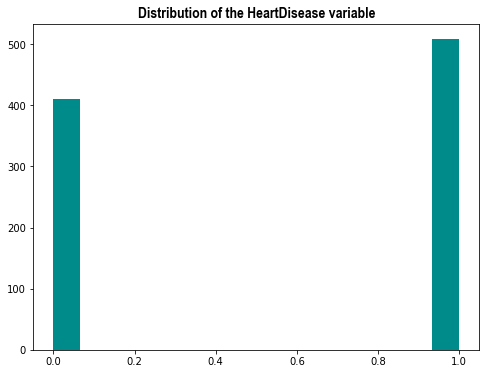

In [105]:
for feature in df.columns:
#background
    f, ax = plt.subplots(figsize=(8,6))
    ax.set_facecolor('white')
#text
    plt.title('Distribution of the {} variable'.format(feature) ,{'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
#Distribution of age variable
    plt.hist(x= df[feature], alpha=1, color="darkcyan", bins=15)
    plt.show()


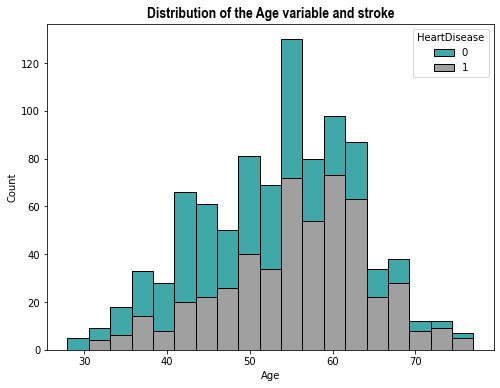

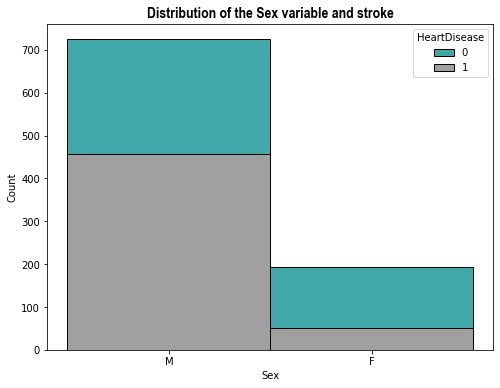

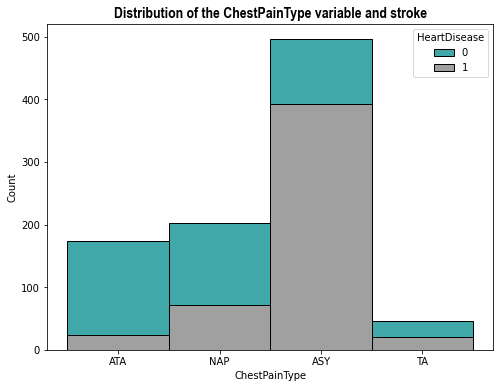

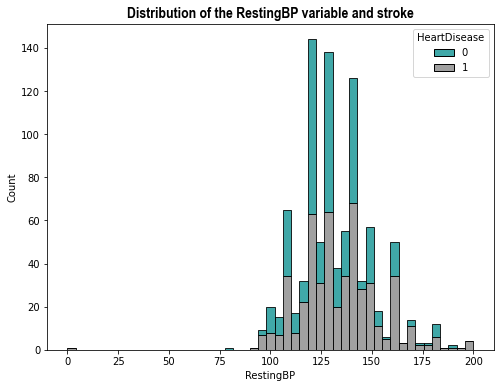

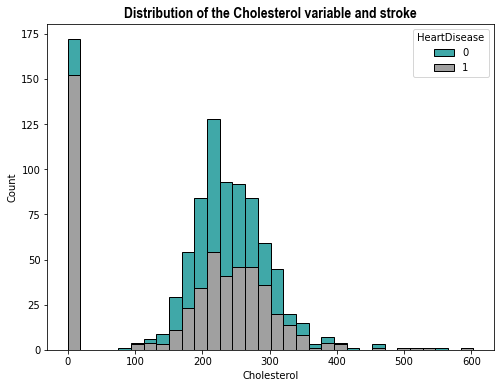

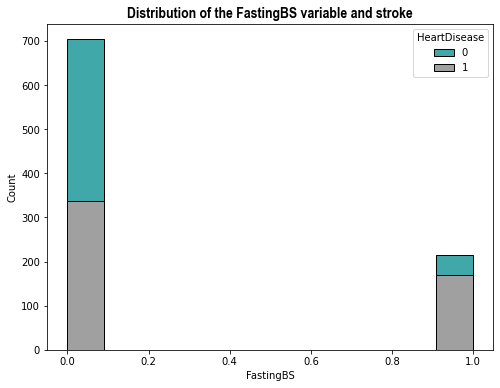

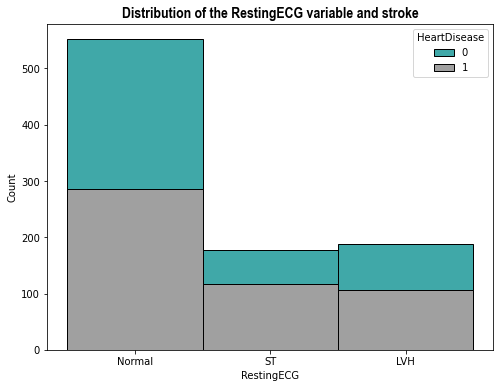

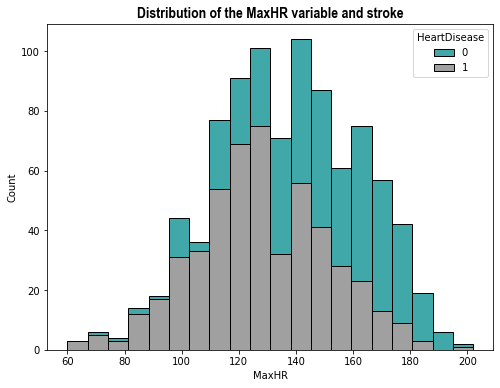

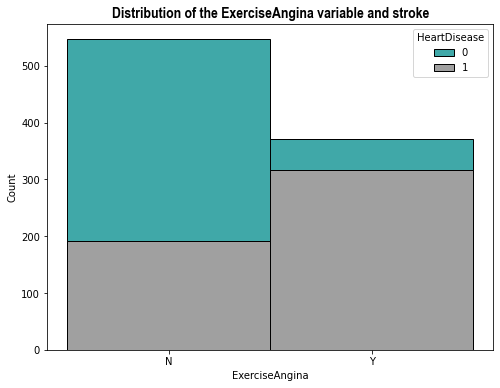

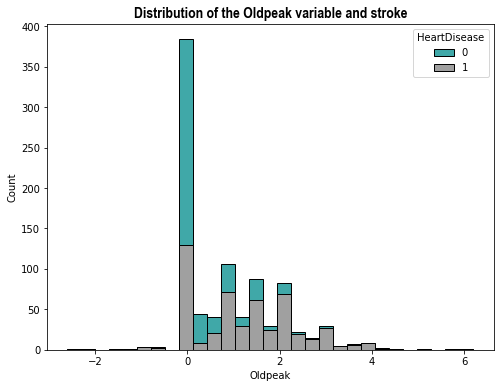

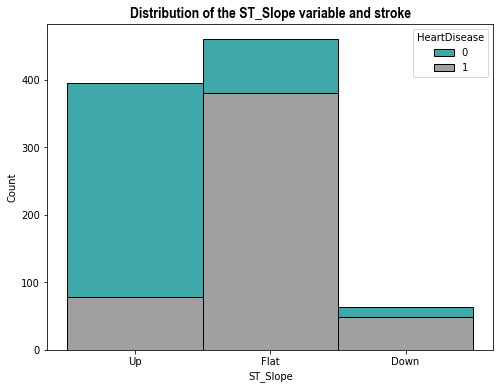

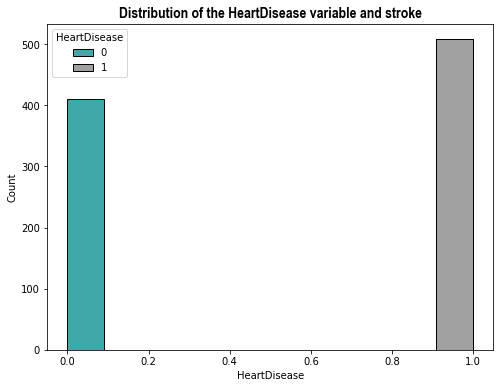

In [106]:
palette2=["darkcyan","grey"]

for i in df.columns:
    f, ax = plt.subplots(figsize=(8,6))
    plt.title("Distribution of the {} variable and stroke".format(i), {'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
    #background
    ax.set_facecolor('white')
    sns.histplot(data= df, x=i, hue= "HeartDisease", stat= "count", palette=palette2, multiple="stack")
    plt.show()

Text(540, 0.0075, 'Healthy')

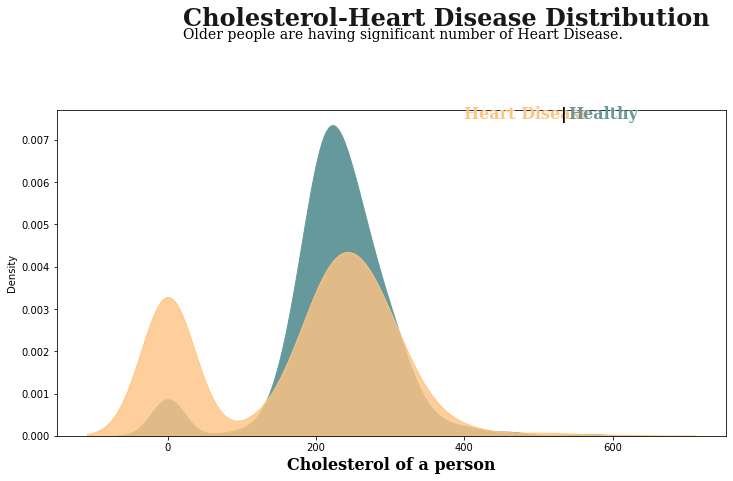

In [107]:
## Age and HeartDisease

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#background
ax.set_facecolor('white')

sns.kdeplot(data = df[df['HeartDisease'] == 0], ax = ax, x = 'Cholesterol', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['HeartDisease'] == 1],ax = ax,x = 'Cholesterol', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Cholesterol of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax.text(20,0.00970,"Cholesterol-Heart Disease Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(20,0.00940,'Older people are having significant number of Heart Disease.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(400,0.00750, 'Heart Disease ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(530, 0.00750, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(540,0.00750, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

<AxesSubplot:xlabel='ChestPainType', ylabel='Cholesterol'>

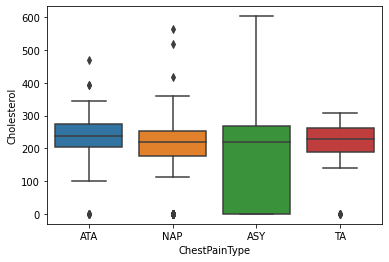

In [108]:
sns.boxplot(data=df, x="ChestPainType", y="Cholesterol")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

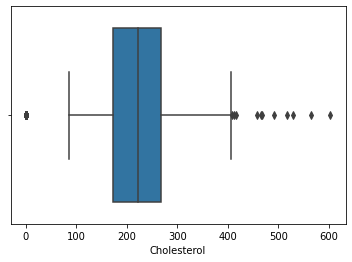

In [109]:
sns.boxplot(df.Cholesterol) 

Text(80, 0.045, 'Healthy')

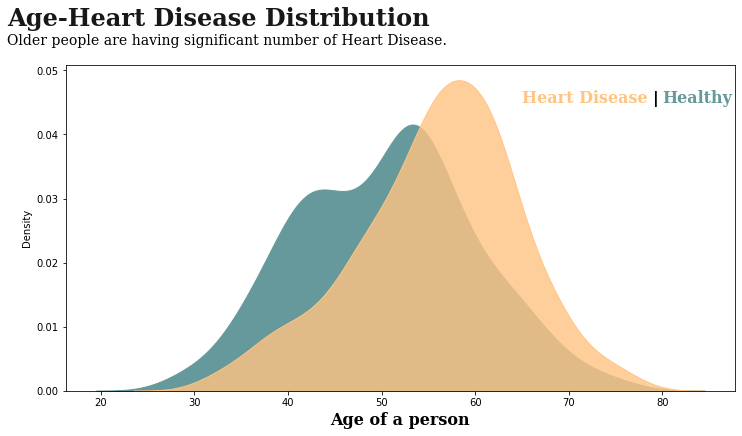

In [110]:
## Age and HeartDisease

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#background
ax.set_facecolor('white')

sns.kdeplot(data = df[df['HeartDisease'] == 0], ax = ax, x = 'Age', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['HeartDisease'] == 1],ax = ax,x = 'Age', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax.text(10,0.0570,"Age-Heart Disease Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(10,0.0540,'Older people are having significant number of Heart Disease.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(65,0.0450, 'Heart Disease ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(79,0.0450, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(80,0.0450, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

#### Split data

In [111]:
### split data
X = df.drop("HeartDisease", axis=1)
y= df["HeartDisease"]

In [112]:
#import train, test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Visualisations

##### Correlation plot

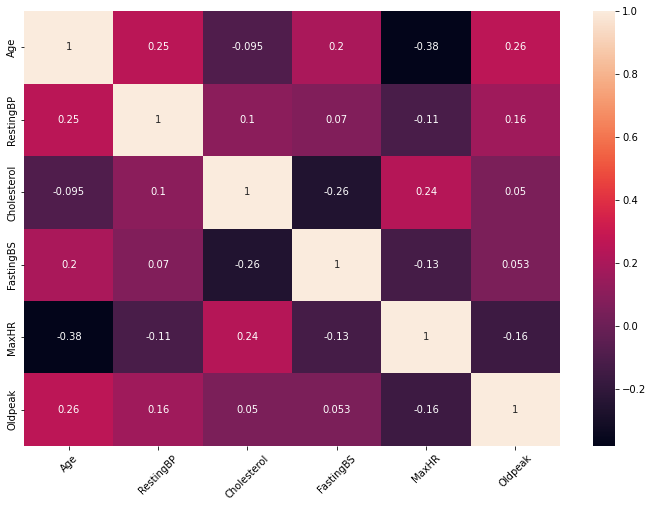

In [113]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True)
plt.xticks(rotation=45);

##### Gini Impurity

#### Missing values

In [115]:
X_train["Cholesterol"] = X_train["Cholesterol"].replace(0, np.nan)
X_train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,597.000000,734.000000,734.000000,734.000000
mean,53.365123,132.098093,244.324958,0.234332,136.254768,0.884605
std,9.483392,18.416692,59.497038,0.423870,25.683172,1.075624
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,206.000000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,238.000000,0.000000,136.500000,0.500000
75%,60.000000,140.000000,277.000000,0.000000,155.750000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_train = 